## Kaitlyn's Analysis

---

### Overall question: How do gamers compare with one another on levels of anxiety, satisfaction with life, and social phobia?

#### Kaitlyn's questions: 
##### - Does the preferred playstyled of a game have an effect on anxiety, satisfaction with life, and social phobia?
##### - Does amount of hours played per week have an effect on anxiety, satisfaction with life, and social phobia?

In [15]:
# dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import ttest_ind
import numpy as np

# file path
full_data_csv = Path('../data_cleanup/Gaming.csv')

# read file
full_data_df = pd.read_csv(full_data_csv)

# preview dataframe
full_data_df.head()

,Unnamed: 0,Entry,Gender,Age,Residence,Birthplace,Work,Degree,Game,Hours per Week,...,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,SPIN Total
0,0,1,Male,25,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Skyrim,15,...,0,0,0,0,0,1,0,1,0,5
1,1,2,Male,41,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Other,8,...,4,0,3,0,1,3,3,1,2,33
2,2,3,Female,32,DEU,DEU,Employed,Bachelor (or equivalent),Other,0,...,0,1,1,3,0,2,4,4,2,31
3,3,4,Male,28,USA,USA,Employed,Bachelor (or equivalent),Other,20,...,0,0,1,3,0,0,1,0,0,11
4,4,5,Male,19,KOR,USA,Employed,High school diploma (or equivalent),Other,20,...,2,0,1,0,0,0,0,3,0,13


### Part 1: Preferred Playstyle Influence on Anxiety, Satisfaction with Life, and Social Phobia

---

##### Null Hypothesis: Preferred playstyle does not have an affect on levels of anxiety, satisfaction with life, or social phobia for an individual who plays games.
##### Alternate Hypothesis: Preferred playstyle has an affect on levels of anxiety, satisfaction with life, or social phobia for an individual who plays games.

In [16]:
# drop columns that are not of interest
playstyle_df = full_data_df.drop(columns = [
    'Unnamed: 0', 'Game', 'Gender', 'Age', 'Residence', 
    'Birthplace', 'Work', 'Degree', 'Gaming Motivation', 
    'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7',
    'SWL1','SWL2', 'SWL3', 'SWL4', 'SWL5',
    'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 
    'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10','SPIN11', 'SPIN12', 
    'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17'
    ])

# display dataframe
playstyle_df.head()

,Entry,Hours per Week,Playstyle,GAD Total,SWL Total,SPIN Total
0,1,15,Singleplayer,1,23,5
1,2,8,Multiplayer - online - with strangers,8,16,33
2,3,0,Singleplayer,8,17,31
3,4,20,Multiplayer - online - with online acquaintanc...,0,17,11
4,5,20,Multiplayer - online - with strangers,14,14,13


In [17]:
# display all unique entries in 'Playstyle' column
playstyle_df['Playstyle'].unique().tolist()

['Singleplayer',
 'Multiplayer - online - with strangers',
 'Multiplayer - online - with online acquaintances or teammates',
 'Multiplayer - online - with real life friends',
 'Multiplayer - offline (people in the same room)',
 'all of the above',
 'Multiplayer - Online - With real friends, and with online acquaintances, and strangers',
 'With strangers and friends',
 'Singleplayer - online',
 'watching',
 'Multiplayer - online with friends, teammates and strangers',
 'Sometimes alone (Ranked), sometimes with friends. Everytime there are strangers in my game ofc',
 'Multiplayer online, with friends (sometimes in the same room), sometimes with strangers.',
 'I prefer playing with RLF but I also play it to make a living.',
 'Multiplayer - online with online team mates and real life friends',
 'Mutliplayer - A mix of friends/strangers.',
 'Multiplayer - online - with real life friends and strangers',
 'Play solo but in skype call with friends',
 'mix of real life friends and online acquai

In [18]:
# categorize as only 'singleplayer' or 'multiplayer'
def categorize_playstyle(style: str) -> str:
    style = style.lower()
    if "multiplayer" in style:
        return "multiplayer"
    elif "singleplayer" in style:
        return "singleplayer"
    else:
        return None

playstyle_df['xPlaystyle'] = playstyle_df.apply(lambda row: categorize_playstyle(row['Playstyle']), axis=1)

# drop columns that did not contain singleplayer or multiplayer
playstyle_df.dropna()

# display dataframe
playstyle_df.head()

,Entry,Hours per Week,Playstyle,GAD Total,SWL Total,SPIN Total,xPlaystyle
0,1,15,Singleplayer,1,23,5,singleplayer
1,2,8,Multiplayer - online - with strangers,8,16,33,multiplayer
2,3,0,Singleplayer,8,17,31,singleplayer
3,4,20,Multiplayer - online - with online acquaintanc...,0,17,11,multiplayer
4,5,20,Multiplayer - online - with strangers,14,14,13,multiplayer


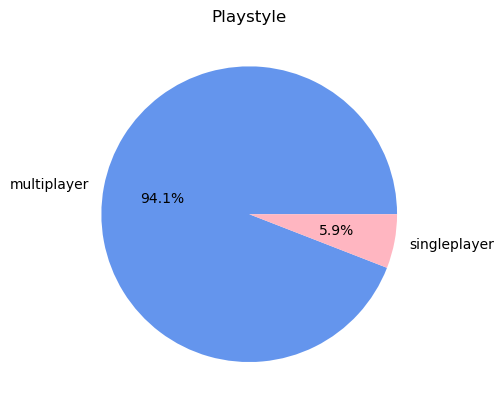

In [50]:
# create pie chart to visualize player distribution

# assign variables
playstyle_counts = playstyle_df['xPlaystyle'].value_counts()
colors = ['cornflowerblue', 'lightpink']
# create pie plot
plt.title('Playstyle')
plt.pie(
        playstyle_counts, 
        labels= playstyle_counts.index, 
        autopct= '%1.1f%%', 
        colors=colors,
        startangle= 0
)

# save figure
plt.savefig('../playstyle_pie')

# diplay figure
plt.show()

In [20]:
# make new dataframe with averages of each score by playstyle
cols = ['xPlaystyle', 'GAD Total', 'SWL Total', 'SPIN Total']
playstyle_mean_df = playstyle_df[cols].groupby(['xPlaystyle']).mean()
playstyle_mean_df = playstyle_mean_df.rename(columns={
    'GAD Total': 'GAD Avg',
    'SWL Total': 'SWL Avg',
    'SPIN Total': 'SPIN Avg'
}).reset_index()

# display dataframe
playstyle_mean_df

,xPlaystyle,GAD Avg,SWL Avg,SPIN Avg
0,multiplayer,5.129767,19.904026,19.440958
1,singleplayer,5.835385,18.583077,22.270769


The t-stat in GAD scores between playstyles is 3.7255375632044907, indicating that the data is statistically significant.
The p-value in GAD scores between playstyles is 0.0001958741384608629, indicating that the data is statistically significant.


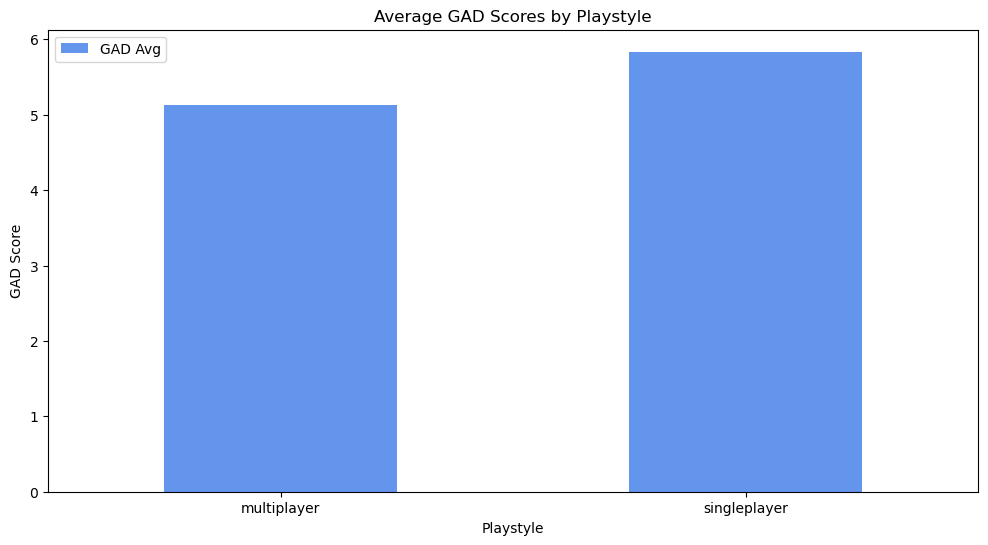

In [53]:
# create bar graph displaying avg GAD scores by playstyle
cols_playstyle_gad_avg = ['GAD Avg']

playstyle_mean_df.plot(
    x='xPlaystyle',
    y=['GAD Avg'], 
    kind='bar', 
    figsize=(12,6), 
    color = 'cornflowerblue',
    xlabel='Playstyle', 
    ylabel='GAD Score', 
    title='Average GAD Scores by Playstyle', 
    rot=0
);

# save figure
plt.savefig('../playstyle_bar_gad')

# determine statistical significance
singleplayer_gad = playstyle_df[playstyle_df['xPlaystyle'] == 'singleplayer']
multiplayer_gad = playstyle_df[playstyle_df['xPlaystyle'] == 'multiplayer']
t_stat, p_value = ttest_ind(singleplayer_gad['GAD Total'], multiplayer_gad['GAD Total'])

if t_stat >= 2 or t_stat <= -2:
    print(f'The t-stat in GAD scores between playstyles is {t_stat}, indicating that the data is statistically significant.')
else:
    print(f'The t-stat in GAD scores between playstyles is {t_stat}, indicating that the data is not statistically significant.')
if p_value < 0.05:
    print(f'The p-value in GAD scores between playstyles is {p_value}, indicating that the data is statistically significant.')
elif p_value > 0.05:
    print(f'The p-value in GAD scores between playstyles is {p_value}, indicating that the data is not statistically significant.')   
    
# display figure
plt.show()

The t-stat in SWL scores between playstyles is -4.536244068287213, indicating that the data is statistically significant.
The p-value in SWL scores between playstyles is 5.787079882751451e-06, indicating that the data is statistically significant.


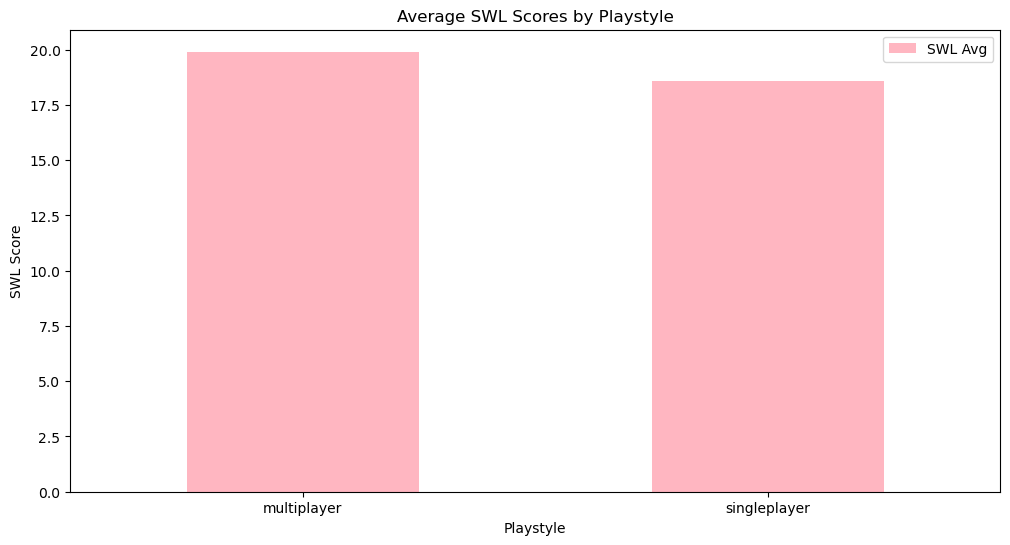

In [57]:
# create bar graph displaying avg SWL scores by playstyle
cols_playstyle_swl_avg = ['SWL Avg']

playstyle_mean_df.plot(
    x='xPlaystyle',
    y=['SWL Avg'], 
    kind='bar', 
    figsize=(12,6), 
    color='lightpink',
    xlabel='Playstyle', 
    ylabel='SWL Score', 
    title='Average SWL Scores by Playstyle', 
    rot=0
);

# save figure
plt.savefig('../playstyle_bar_swl')

# determine statistical significance
singleplayer_swl = playstyle_df[playstyle_df['xPlaystyle'] == 'singleplayer']
multiplayer_swl = playstyle_df[playstyle_df['xPlaystyle'] == 'multiplayer']
t_stat, p_value = ttest_ind(singleplayer_swl['SWL Total'], multiplayer_swl['SWL Total'])

if t_stat >= 2 or t_stat <= -2:
    print(f'The t-stat in SWL scores between playstyles is {t_stat}, indicating that the data is statistically significant.')
else:
    print(f'The t-stat in SWL scores between playstyles is {t_stat}, indicating that the data is not statistically significant.')
if p_value < 0.05:
    print(f'The p-value in SWL scores between playstyles is {p_value}, indicating that the data is statistically significant.')
elif p_value > 0.05:
    print(f'The p-value in SWL scores between playstyles is {p_value}, indicating that the data is not statistically significant.')

# display figure
plt.show()


The t-stat in SPIN scores between playstyles is 5.221282847874713, indicating that the data is statistically significant.
The p-value in SPIN scores between playstyles is 1.8092883169535443e-07, indicating that the data is statistically significant.


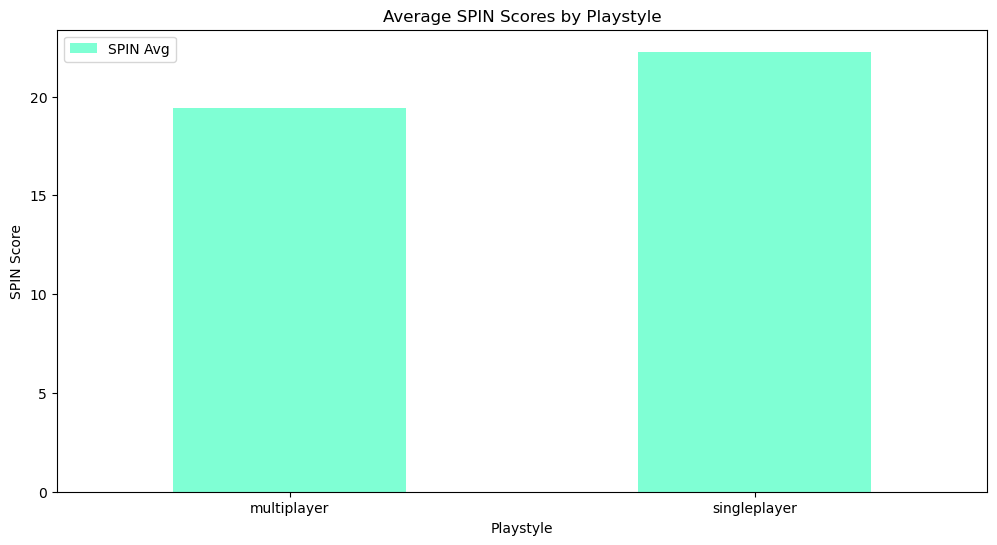

In [62]:
# create bar graph displaying avg scores by playstyle
cols_playstyle_spin_avg = ['SPIN Avg']

playstyle_mean_df.plot(
    x='xPlaystyle',
    y=['SPIN Avg'], 
    kind='bar', 
    figsize=(12,6), 
    color='aquamarine',
    xlabel='Playstyle', 
    ylabel='SPIN Score', 
    title='Average SPIN Scores by Playstyle', 
    rot=0
);

# save figure
plt.savefig('../playstyle_bar_spin')

# determine statistical significance
singleplayer_spin = playstyle_df[playstyle_df['xPlaystyle'] == 'singleplayer']
multiplayer_spin = playstyle_df[playstyle_df['xPlaystyle'] == 'multiplayer']
t_stat, p_value = ttest_ind(singleplayer_spin['SPIN Total'], multiplayer_spin['SPIN Total'])

if t_stat >= 2 or t_stat <= -2:
    print(f'The t-stat in SPIN scores between playstyles is {t_stat}, indicating that the data is statistically significant.')
else:
    print(f'The t-stat in SPIN scores between playstyles is {t_stat}, indicating that the data is not statistically significant.')
if p_value < 0.05:
    print(f'The p-value in SPIN scores between playstyles is {p_value}, indicating that the data is statistically significant.')
elif p_value > 0.05:
    print(f'The p-value in SPIN scores between playstyles is {p_value}, indicating that the data is not statistically significant.')

# display figure
plt.show()

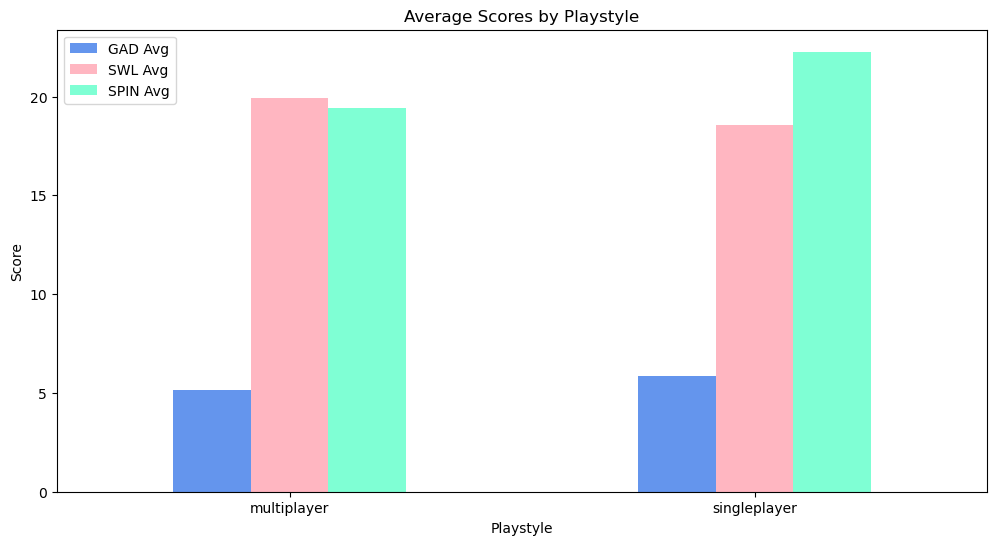

In [60]:
# create bar graph summarizing avg scores by playstyle
cols_playstyle_avg = ['GAD Avg', 'SWL Avg', 'SPIN Avg']
color = ['cornflowerblue', 'lightpink', 'aquamarine']

playstyle_mean_df.plot(
    x='xPlaystyle',
    y=['GAD Avg', 'SWL Avg', 'SPIN Avg'], 
    kind='bar', 
    figsize=(12,6), 
    color=color,
    xlabel='Playstyle', 
    ylabel='Score', 
    title='Average Scores by Playstyle', 
    rot=0
);

# save figure
plt.savefig('../playstyle_bar_all')

# display figure
plt.show()

### Part 2: Hours Played Influence on Anxiety, Satisfaction with Life, and Social Phobia

---

##### Null Hypothesis: Hours played per week does not have an affect on levels of anxiety, satisfaction with life, or social phobia for an individual who plays games.
##### Alternate Hypothesis: Hours played per week has an affect on levels of anxiety, satisfaction with life, or social phobia for an individual who plays games.

In [25]:
# drop columns that are not of interest
hours_df = full_data_df.drop(columns = [
    'Unnamed: 0', 'Game', 'Gender', 'Age', 'Residence', 
    'Birthplace', 'Work', 'Degree', 'Gaming Motivation', 'Playstyle',
    'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7',
    'SWL1','SWL2', 'SWL3', 'SWL4', 'SWL5',
    'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 
    'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10','SPIN11', 'SPIN12', 
    'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17'
    ])

# display dataframe
hours_df.head()

,Entry,Hours per Week,GAD Total,SWL Total,SPIN Total
0,1,15,1,23,5
1,2,8,8,16,33
2,3,0,8,17,31
3,4,20,0,17,11
4,5,20,14,14,13


In [26]:
# find minimum hours per week played
hours_df['Hours per Week'].min()

0

In [27]:
# drop rows with 0 hours
zero_hours = hours_df[hours_df['Hours per Week'] == 0].index
hours_df.drop(zero_hours, inplace=True)

# display dataframe
hours_df.head()

,Entry,Hours per Week,GAD Total,SWL Total,SPIN Total
0,1,15,1,23,5
1,2,8,8,16,33
3,4,20,0,17,11
4,5,20,14,14,13
5,6,4,1,17,13


In [28]:
# find new minimum hours per week played
hours_df['Hours per Week'].min()

1

In [29]:
# find maximum hours per week played
hours_df['Hours per Week'].max()

140

In [30]:
# make copy of hours_df
hours_halved_df = hours_df.copy()

In [31]:
# create bins
bins = [1, 70, 140]

# create names for binds
hours_halved = ['70 or Less', 'More than 70']

In [32]:
# slice data and place into bins
hours_halved_df['Hours per Week Range'] = pd.cut(hours_halved_df['Hours per Week'], 
                                          bins, labels=hours_halved, 
                                          include_lowest=True)

# display dataframe
hours_halved_df.head()

,Entry,Hours per Week,GAD Total,SWL Total,SPIN Total,Hours per Week Range
0,1,15,1,23,5,70 or Less
1,2,8,8,16,33,70 or Less
3,4,20,0,17,11,70 or Less
4,5,20,14,14,13,70 or Less
5,6,4,1,17,13,70 or Less


In [33]:
# make new dataframe with averages of each score by hours played per week
cols = ['Hours per Week Range', 'GAD Total', 'SWL Total', 'SPIN Total']
hours_halved_mean_df = hours_halved_df[cols].groupby(['Hours per Week Range']).mean()
hours_halved_mean_df = hours_halved_mean_df.rename(columns={
    'GAD Total': 'GAD Avg',
    'SWL Total': 'SWL Avg',
    'SPIN Total': 'SPIN Avg'
}).reset_index()

# display dataframe
hours_halved_mean_df.head()

C:\Users\huynh\AppData\Local\Temp\ipykernel_23000\1449218232.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_halved_mean_df = hours_halved_df[cols].groupby(['Hours per Week Range']).mean()


,Hours per Week Range,GAD Avg,SWL Avg,SPIN Avg
0,70 or Less,5.142172,19.863801,19.538281
1,More than 70,8.038462,15.243590,25.474359


The t-stat in GAD scores between lower and higher amounts of hours played is -5.441748333375033, indicating that the data is statistically significant.
The t-stat in GAD scores between lower and higher amounts of hours played is  5.387779280062176e-08, indicating that the data is statistically significant.


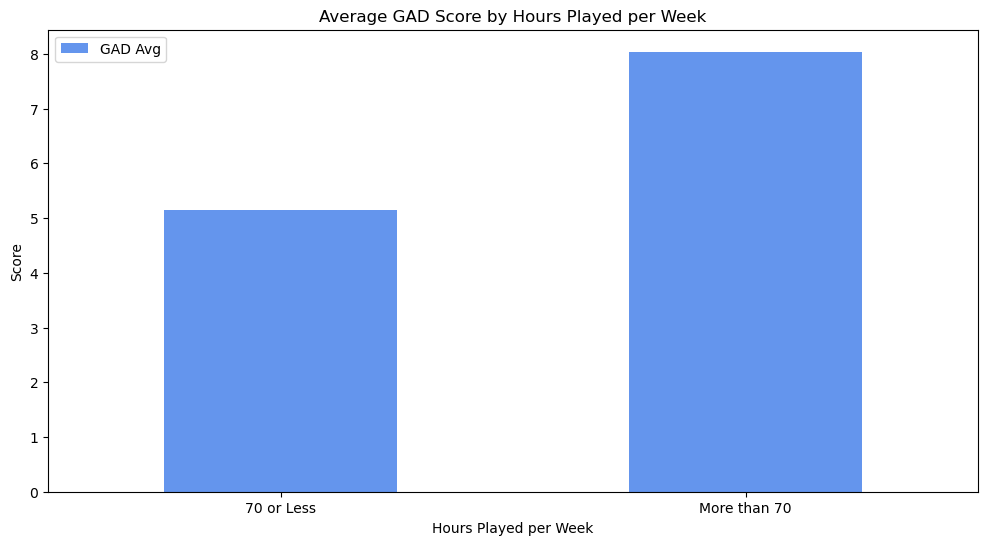

In [64]:
# create bar graph displaying avg GAD score by hours played per week
cols_hours_gad_avg = ['GAD Avg']

hours_halved_mean_df.plot(
    x='Hours per Week Range',
    y=['GAD Avg'], 
    kind='bar', 
    figsize=(12,6), 
    color='cornflowerblue',
    xlabel='Hours Played per Week', 
    ylabel='Score', 
    title='Average GAD Score by Hours Played per Week', 
    rot=0
);

# statistical significance of GAD scores between lower and higher hours played
gad_low_hr = playstyle_df[(playstyle_df['Hours per Week'] <= 70)]
gad_high_hr = playstyle_df[(playstyle_df['Hours per Week'] > 70)]
t_stat, p_value = ttest_ind(gad_low_hr['GAD Total'], gad_high_hr['GAD Total'])

if t_stat >= 2 or t_stat <= -2:
    print(f'The t-stat in GAD scores between lower and higher amounts of hours played is {t_stat}, indicating that the data is statistically significant.')
else:
    print(f'The t-stat in GAD scores between lower and higher amounts of hours played is {t_stat}, indicating that the data is not statistically significant.')
if p_value < 0.05:
    print(f'The t-stat in GAD scores between lower and higher amounts of hours played is  {p_value}, indicating that the data is statistically significant.')
elif p_value > 0.05:
    print(f'The t-stat in GAD scores between lower and higher amounts of hours played is {p_value}, indicating that the data is not statistically significant.')

# save figure
plt.savefig('../hours_halved_gad_bar')

# display figure
plt.show()

The t-stat in SWL scores between lower and higher amounts of hours played is 5.654187787723389, indicating that the data is statistically significant.
The p-value in SWL scores between lower and higher amounts of hours played is 1.6043926344696598e-08, indicating that the data is statistically significant.


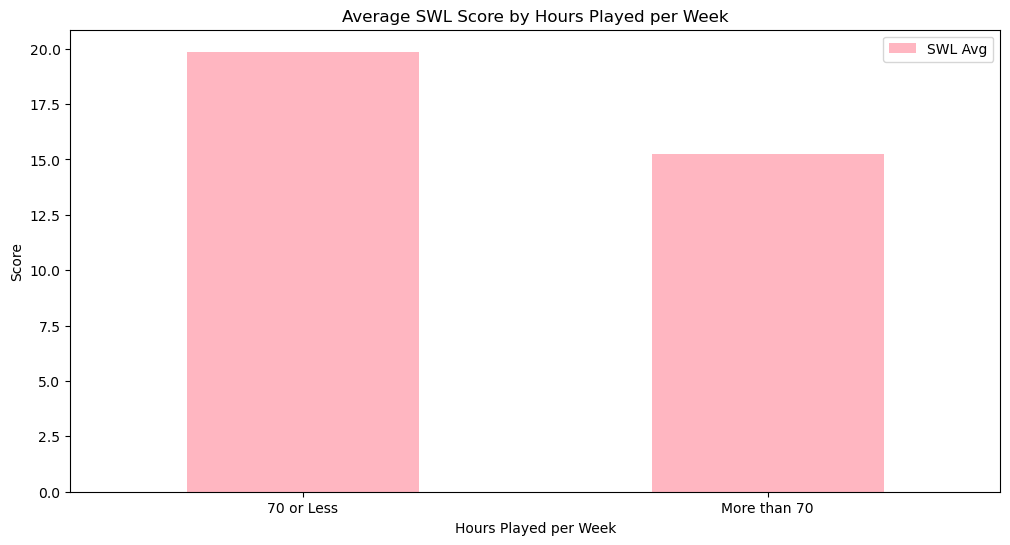

In [66]:
# create bar graph displaying avg GAD score by hours played per week
cols_hours_swl_avg = ['SWL Avg']

hours_halved_mean_df.plot(
    x='Hours per Week Range',
    y=['SWL Avg'], 
    kind='bar', 
    figsize=(12,6), 
    color='lightpink',
    xlabel='Hours Played per Week', 
    ylabel='Score', 
    title='Average SWL Score by Hours Played per Week', 
    rot=0
);

# find statistical significance of SWL scores between lower and higher hours played
swl_low_hr = playstyle_df[(playstyle_df['Hours per Week'] <= 70)]
swl_high_hr = playstyle_df[(playstyle_df['Hours per Week'] > 70)]
t_stat, p_value = ttest_ind(swl_low_hr['SWL Total'], swl_high_hr['SWL Total'])

if t_stat >= 2 or t_stat <= -2:
    print(f'The t-stat in SWL scores between lower and higher amounts of hours played is {t_stat}, indicating that the data is statistically significant.')
else:
    print(f'The t-stat in SWL scores between lower and higher amounts of hours played is {t_stat}, indicating that the data is not statistically significant.')
if p_value < 0.05:
    print(f'The p-value in SWL scores between lower and higher amounts of hours played is {p_value}, indicating that the data is statistically significant.')
elif p_value > 0.05:
    print(f'The p-value in SWL scores between lower and higher amounts of hours played is {p_value}, indicating that the data is not statistically significant.')

# save figure
plt.savefig('../hours_halved_swl_bar')

# display figure
plt.show()

The t-stat in SPIN scores between lower and higher amounts of hours played is -3.8966182057566945, indicating that the data is statistically significant.
The p-value in SPIN scores between lower and higher amounts of hours played is 9.8116312394103e-05, indicating that the data is statistically significant.


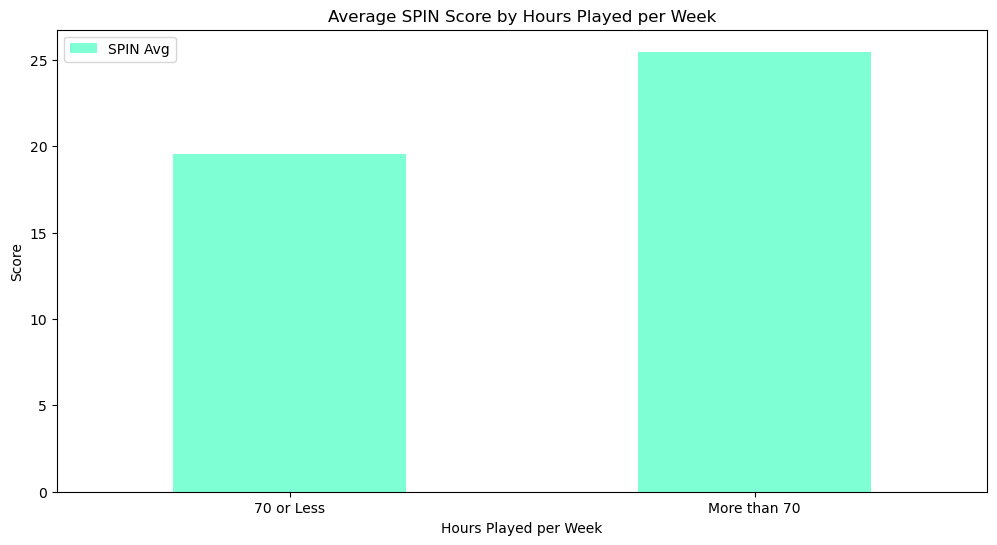

In [67]:
# create bar graph displaying avg SPIN score by hours played per week
cols_hours_spin_avg = ['SPIN Avg']

hours_halved_mean_df.plot(
    x='Hours per Week Range',
    y=['SPIN Avg'], 
    kind='bar', 
    figsize=(12,6), 
    color='aquamarine',
    xlabel='Hours Played per Week', 
    ylabel='Score', 
    title='Average SPIN Score by Hours Played per Week', 
    rot=0
);

# find statistical significance of GAD scores between lower and higher hours played
spin_low_hr = playstyle_df[(playstyle_df['Hours per Week'] <= 70)]
spin_high_hr = playstyle_df[(playstyle_df['Hours per Week'] > 70)]
t_stat, p_value = ttest_ind(spin_low_hr['SPIN Total'], spin_high_hr['SPIN Total'])

if t_stat >= 2 or t_stat <= -2:
    print(f'The t-stat in SPIN scores between lower and higher amounts of hours played is {t_stat}, indicating that the data is statistically significant.')
else:
    print(f'The t-stat in SPIN scores between lower and higher amounts of hours played is {t_stat}, indicating that the data is not statistically significant.')
if p_value < 0.05:
    print(f'The p-value in SPIN scores between lower and higher amounts of hours played is {p_value}, indicating that the data is statistically significant.')
elif p_value > 0.05:
    print(f'The p-value in SPIN scores between lower and higher amounts of hours played is {p_value}, indicating that the data is not statistically significant.')

# save figure
plt.savefig('../hours_halved_spin_bar')

# display figure
plt.show()

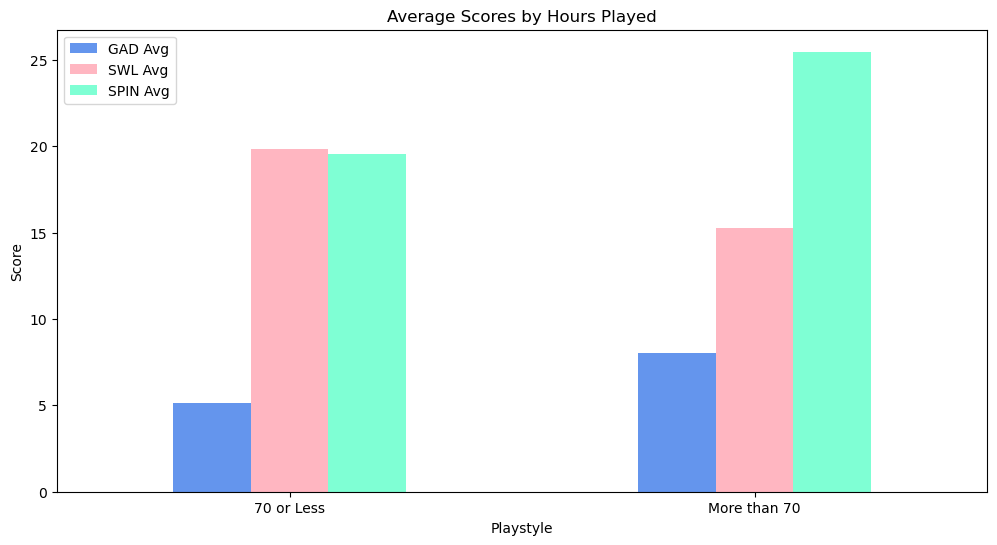

In [69]:
# create bar graph summarizing avg scores by hours played
cols_hours_avg = ['GAD Avg', 'SWL Avg', 'SPIN Avg']
color=['cornflowerblue', 'lightpink', 'aquamarine']

hours_halved_mean_df.plot(
    x='Hours per Week Range',
    y=['GAD Avg', 'SWL Avg', 'SPIN Avg'], 
    kind='bar', 
    figsize=(12,6), 
    color=color,
    xlabel='Playstyle', 
    ylabel='Score', 
    title='Average Scores by Hours Played', 
    rot=0
);

# save figure
plt.savefig('../hours_halved_bar_all')

# display figure
plt.show()

#### Bonus Analysis: Separating hours played into more bins to better visualize trends in scores.

In [71]:
# create bins for hours played
bins = [1, 20, 40, 60, 80, 140]

# create names for bins
hour_ranges = ['1 to 20', '21 to 40', '41 to 60', '61 to 80', '80+']

In [72]:
# slice data and place into bins
hours_df['Hours per Week Range'] = pd.cut(hours_df['Hours per Week'], 
                                          bins, labels=hour_ranges, 
                                          include_lowest=True)

# display dataframe
hours_df.head()

,Entry,Hours per Week,GAD Total,SWL Total,SPIN Total,Hours per Week Range
0,1,15,1,23,5,1 to 20
1,2,8,8,16,33,1 to 20
3,4,20,0,17,11,1 to 20
4,5,20,14,14,13,1 to 20
5,6,4,1,17,13,1 to 20


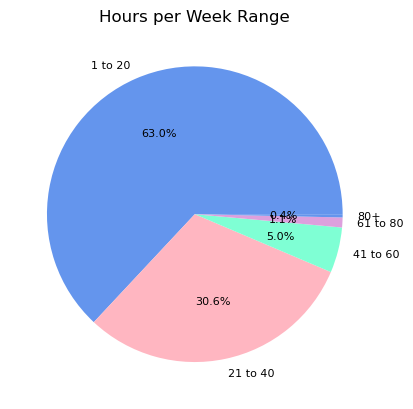

In [74]:
# create pie chart to visualize hours played

# assign variables
hours_counts = hours_df['Hours per Week Range'].value_counts()
colors=['cornflowerblue', 'lightpink', 'aquamarine', 'plum']

# create pie plot
plt.title('Hours per Week Range')
plt.pie(
    hours_counts, 
    labels=hours_counts.index, 
    autopct='%1.1f%%', 
    startangle=0,
    textprops={'fontsize': 8},
    colors=colors
)

# save figure
plt.savefig('../hours_pie')

# display figure
plt.show()

In [77]:
# make new dataframe with averages of each score by hours played per week
cols_2 = ['Hours per Week Range', 'GAD Total', 'SWL Total', 'SPIN Total']
hours_mean_df = hours_df[cols_2].groupby(['Hours per Week Range']).mean()
hours_mean_df = hours_mean_df.rename(columns={
    'GAD Total': 'GAD Avg',
    'SWL Total': 'SWL Avg',
    'SPIN Total': 'SPIN Avg'
}).reset_index()

# display dataframe
hours_mean_df.head()

C:\Users\huynh\AppData\Local\Temp\ipykernel_23000\2243279845.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_mean_df = hours_df[cols_2].groupby(['Hours per Week Range']).mean()


,Hours per Week Range,GAD Avg,SWL Avg,SPIN Avg
0,1 to 20,4.920160,20.422726,18.695894
1,21 to 40,5.364785,19.164903,20.644033
2,41 to 60,6.413043,17.465580,22.952899
3,61 to 80,6.859504,16.429752,23.595041
4,80+,8.128205,15.666667,25.538462


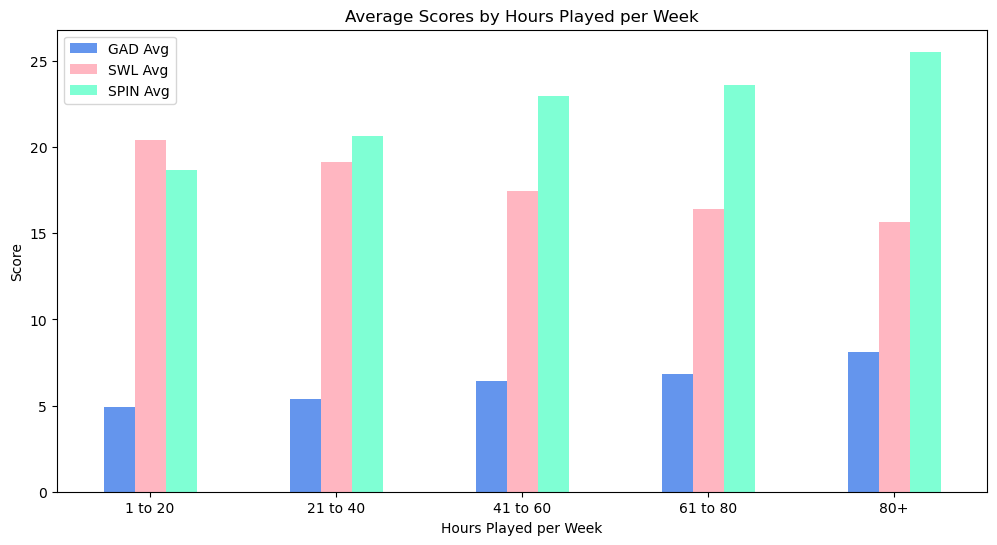

In [78]:
# create bar graph displaying avg scores by hours played per week
cols_2_avg = ['GAD Avg', 'SWL Avg', 'SPIN Avg']
color = ['cornflowerblue', 'lightpink', 'aquamarine']

hours_mean_df.plot(
    x='Hours per Week Range',
    y=['GAD Avg', 'SWL Avg', 'SPIN Avg'], 
    kind='bar', 
    figsize=(12,6), 
    color=color,
    xlabel='Hours Played per Week', 
    ylabel='Score', 
    title='Average Scores by Hours Played per Week', 
    rot=0
);

# save figure
plt.savefig('../hours_bar')

# display figure
plt.show()